### Question: After how many generations do all the survived descendants originate from the same ancestor? 

In [1]:
import numpy as np
from tqdm import tnrange
import matplotlib.pyplot as plt

In [2]:
initial_parents_num = 100
roll_out_number = 100

In [3]:
def reproduction(parents_num):
    children = np.random.randint(2, size=2*parents_num)
    return children

In [4]:
# TODO: consider the case in which the roll out won't terminate

generation_count_list = []
parents_dict = dict()

for _ in tnrange(roll_out_number):
    parents_num = initial_parents_num
    
    generation_count = 0
    init_sub_ancestor = 1
    
    for i in range(initial_parents_num):
        parents_dict[i] = init_sub_ancestor
    
    while True: 
#         print(f'{generation_count}th generation')
        for p in range(initial_parents_num):
            
            children = list(reproduction(parents_dict[p]))
#             print(p, children)
            parents_dict[p] = children.count(1) #binomial distribution, p=0.5, N=parents_dict[p]
#             print(parants_dict[p])
        
        if list(parents_dict.values()).count(0) == (initial_parents_num - 1):
            break
        
        generation_count += 1
        
#         print(parants_dict)
    generation_count_list.append(generation_count)
np.average(generation_count_list)

347.23

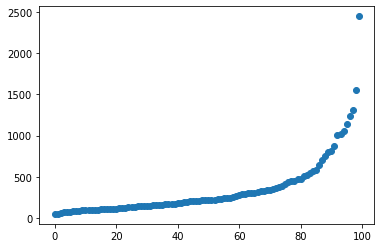

In [5]:
fig, ax = plt.subplots()
ax.scatter(np.arange(len(generation_count_list)), sorted(generation_count_list))
plt.show()

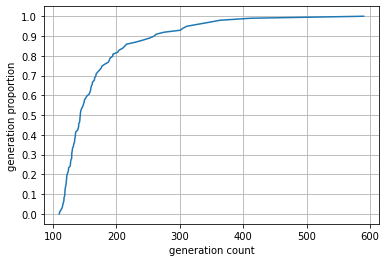

In [6]:
fig, ax = plt.subplots()
ax.plot(sorted(generation_count_list), np.linspace(0, 1, len(generation_count_list)))
ax.set_xticklabels(np.arange(0, 1100, 100))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.grid()
ax.set_xlabel('generation count')
ax.set_ylabel('generation proportion')
plt.show()

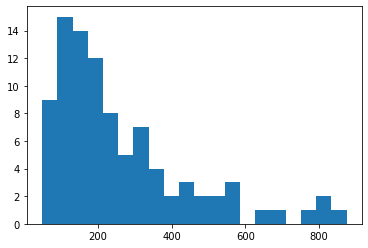

In [7]:
fig, ax = plt.subplots()
generation_count_list = [count for count in generation_count_list if count <1000]
ax.hist(generation_count_list, 20)
plt.show()

### Birthday Problem

In [ ]:
def p_birthday_among_n_people(n):
    p = 1
    for i in range(n):
        p *= (365-i)/365
    return (1 - p) 

In [ ]:
p_birthday_among_n_people(70)

In [ ]:
p_list = []
for n in range(2, 300):
    p_list.append(p_birthday_among_n_people(n))
fig, ax = plt.subplots()
ax.plot(p_list)
plt.show()